# Locally Weighted Scatterplot Smoothing (LOWESS)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2007-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2007-01-03,19.520000,19.520000,20.400000,19.350000,20.080000,28350300
2007-01-04,19.790001,19.790001,19.860001,19.320000,19.660000,23652500
2007-01-05,19.709999,19.709999,19.910000,19.540001,19.540001,15902400
2007-01-08,19.469999,19.469999,19.860001,19.370001,19.709999,15814800
2007-01-09,19.650000,19.650000,19.709999,19.370001,19.450001,14494200


In [3]:
dataset = dataset.reset_index()
dataset.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2007-01-03,19.520000,19.520000,20.400000,19.350000,20.080000,28350300
1,2007-01-04,19.790001,19.790001,19.860001,19.320000,19.660000,23652500
2,2007-01-05,19.709999,19.709999,19.910000,19.540001,19.540001,15902400
3,2007-01-08,19.469999,19.469999,19.860001,19.370001,19.709999,15814800
4,2007-01-09,19.650000,19.650000,19.709999,19.370001,19.450001,14494200


In [4]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

In [5]:
dataset.tail()

,Date,Adj Close,Close,High,Low,Open,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
2928,2018-08-20,19.980000,19.980000,20.08,19.350000,19.790001,62983200,0,1,1,0.010622
2929,2018-08-21,20.400000,20.400000,20.42,19.860001,19.980000,55629000,1,1,1,0.021021
2930,2018-08-22,20.900000,20.900000,20.92,20.209999,20.280001,62002700,1,1,1,0.024510
2931,2018-08-23,22.290001,22.290001,22.32,21.139999,21.190001,113444100,1,1,1,0.066507
2932,2018-08-24,23.980000,23.980000,24.00,22.670000,22.910000,164328200,0,0,0,0.075819


In [6]:
import statsmodels.api as sm

In [7]:
X = dataset['Adj Close']
y = dataset['Returns']

In [8]:
lowess = sm.nonparametric.lowess(X, y, frac=.3)

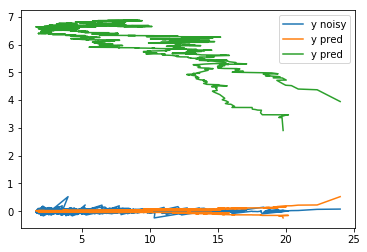

In [9]:
pl.clf()
pl.plot(X, y, label='y noisy')
pl.plot(X, lowess, label='y pred')
pl.legend()
pl.show()

In [10]:
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

In [11]:
from scipy.interpolate import interp1d
f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/10. for i in range(400)]

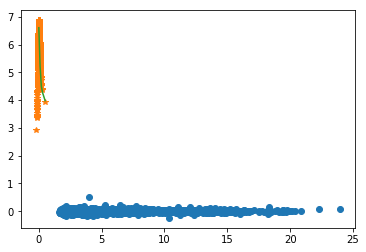

In [12]:
ynew = f(xnew)

plt.plot(X, y, 'o')
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()